### This project was taken from the following link

https://thecleverprogrammer.com/2022/07/19/book-recommendation-system-using-python/

In [1]:
import pandas as pd
import numpy as np

import zipfile
import io

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import linear_kernel

In [59]:
path = '/Archivos de trabajo/book_data.csv.zip'
# Adjusted for privacy

In [60]:
z = zipfile.ZipFile(path)

In [61]:
df = pd.read_csv(z.open(z.namelist()[0]))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54301 entries, 0 to 54300
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book_authors       54301 non-null  object 
 1   book_desc          52970 non-null  object 
 2   book_edition       5453 non-null   object 
 3   book_format        52645 non-null  object 
 4   book_isbn          41435 non-null  object 
 5   book_pages         51779 non-null  object 
 6   book_rating        54301 non-null  float64
 7   book_rating_count  54301 non-null  int64  
 8   book_review_count  54301 non-null  int64  
 9   book_title         54301 non-null  object 
 10  genres             51059 non-null  object 
 11  image_url          53618 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 5.0+ MB


In [62]:
data = df[['book_title', 'book_desc', 'book_rating_count']]

In [63]:
data.head()

,book_title,book_desc,book_rating_count
0,The Hunger Games,Winning will make you famous. Losing means cer...,5519135
1,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,2041594
2,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,3745197
3,Pride and Prejudice,«È cosa ormai risaputa che a uno scapolo in po...,2453620
4,Twilight,About three things I was absolutely positive.F...,4281268


In [64]:
data.isnull().sum()

book_title              0
book_desc            1331
book_rating_count       0
dtype: int64

In [65]:
top_5 = data.sort_values(by='book_rating_count', ascending=False).head(5)
top_5

,book_title,book_desc,book_rating_count
50,Harry Potter and the Sorcerer's Stone,Harry Potter's life is miserable. His parents ...,5588580
44271,Los juegos del hambre,\r\r\nGanar significa fama y fortuna. Perder s...,5523413
28154,Bado žaidynės,LAIMĖJIMAS ATNEŠ ŠLOVĘ IR TURTĄ.PRALAIMĖJIMAS ...,5522714
25990,Açlık Oyunları,"Etkileyici bir fantastik dünya, bitmek bilmeye...",5522513
21895,Hunger Games,"Quando Katniss urla ""Mi offro volontaria, mi o...",5522483


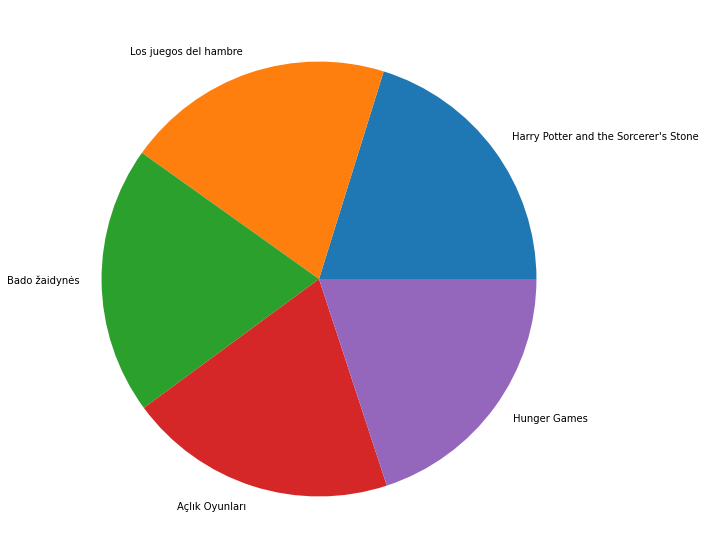

In [66]:
plt.figure(figsize=(15,10), facecolor='white')
plt.pie(x=top_5.book_rating_count.values, labels=top_5.book_title.values)
plt.show()

In [67]:
data.dropna(inplace=True)

C:\Users\52551\AppData\Local\Temp\ipykernel_6440\1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52970 entries, 0 to 54300
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   book_title         52970 non-null  object
 1   book_desc          52970 non-null  object
 2   book_rating_count  52970 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [74]:
data = data.iloc[0:30000]
data.head()

,book_title,book_desc,book_rating_count
0,The Hunger Games,Winning will make you famous. Losing means cer...,5519135
1,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,2041594
2,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,3745197
3,Pride and Prejudice,«È cosa ormai risaputa che a uno scapolo in po...,2453620
4,Twilight,About three things I was absolutely positive.F...,4281268


In [75]:
feature = data['book_desc'].tolist()
tfidf = text.TfidfVectorizer(input=feature, stop_words='english')
tfidf_matrix = tfidf.fit_transform(feature)
similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [76]:
indices = pd.Series(data.index, index=data['book_title']).drop_duplicates()

In [77]:
def book_recommendation(title, similarity = similarity):
    index = indices[title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:5]
    bookindices = [i[0] for i in similarity_scores]
    return data['book_title'].iloc[bookindices]

In [90]:
index = indices['The Gunslinger'][0]
sim_score = list(enumerate(similarity[index]))
sim_score = sorted(sim_score, key=lambda x: x[1], reverse=True)
sim_score = sim_score[0:10]
book_ind = [i[0] for i in sim_score]
data['book_title'].iloc[book_ind]

359                              Beautiful Creatures
26118                            Beautiful Creatures
1048                              Beautiful Darkness
2107                            Beautiful Redemption
8393     The Beautiful Creatures Complete Collection
1504                                 Beautiful Chaos
2844                                 The Lost Prince
16124                            Someone Is Watching
11868                                   Rising Tides
12594                        Ethan, Who Loved Carter
Name: book_title, dtype: object